In [1]:
import torch.nn.functional as F
import torchvision.transforms as T
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import os
from PIL import Image
import torch
import numpy as np
from xai.src_xai.score_cam import score_cam
from xai.src_xai.utils import load_discriminator, get_tensor_image, show_originals_and_heatmaps, tensor_to_numpy_image

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [2]:
gen_config_resnet = {
    "name": "resnet",
    "num_resblocks": 9,
    "hidden_channels": 64,
}

a_disc_resnet = load_discriminator("./checkpoints/aivazovsky resnet/last.ckpt")
target_layer = a_disc_resnet.model[4]


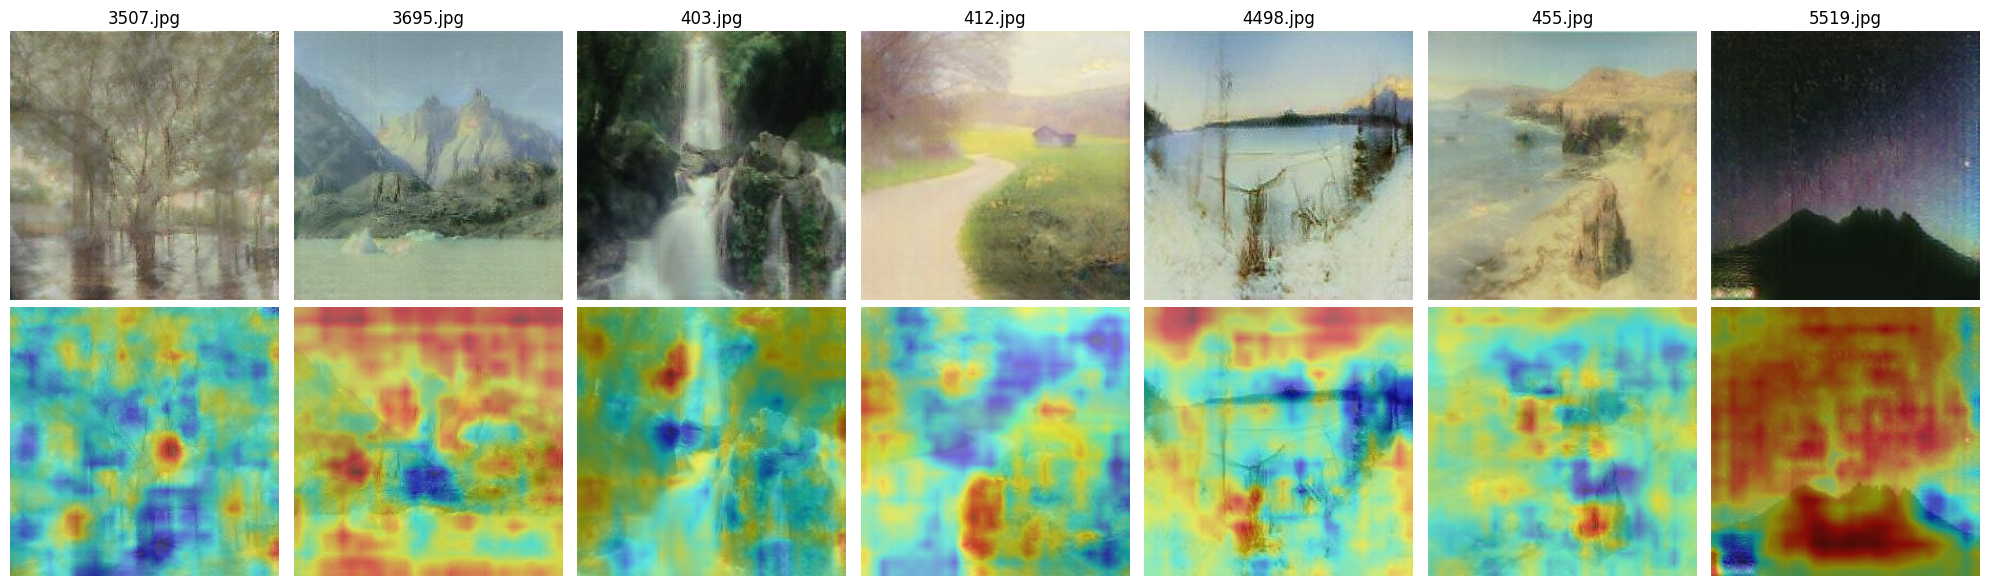

In [11]:
image_paths = sorted(os.listdir("./xai/results/aivazovsky_resnet"))[:7]
images = [get_tensor_image(Image.open("./xai/results/aivazovsky_resnet/" + i).convert("RGB")) for i in image_paths]

heatmaps = [score_cam(a_disc_resnet, target_layer, i) for i in images]
images_np = [tensor_to_numpy_image(img) for img in images]

show_originals_and_heatmaps(images_np, heatmaps, titles=image_paths)

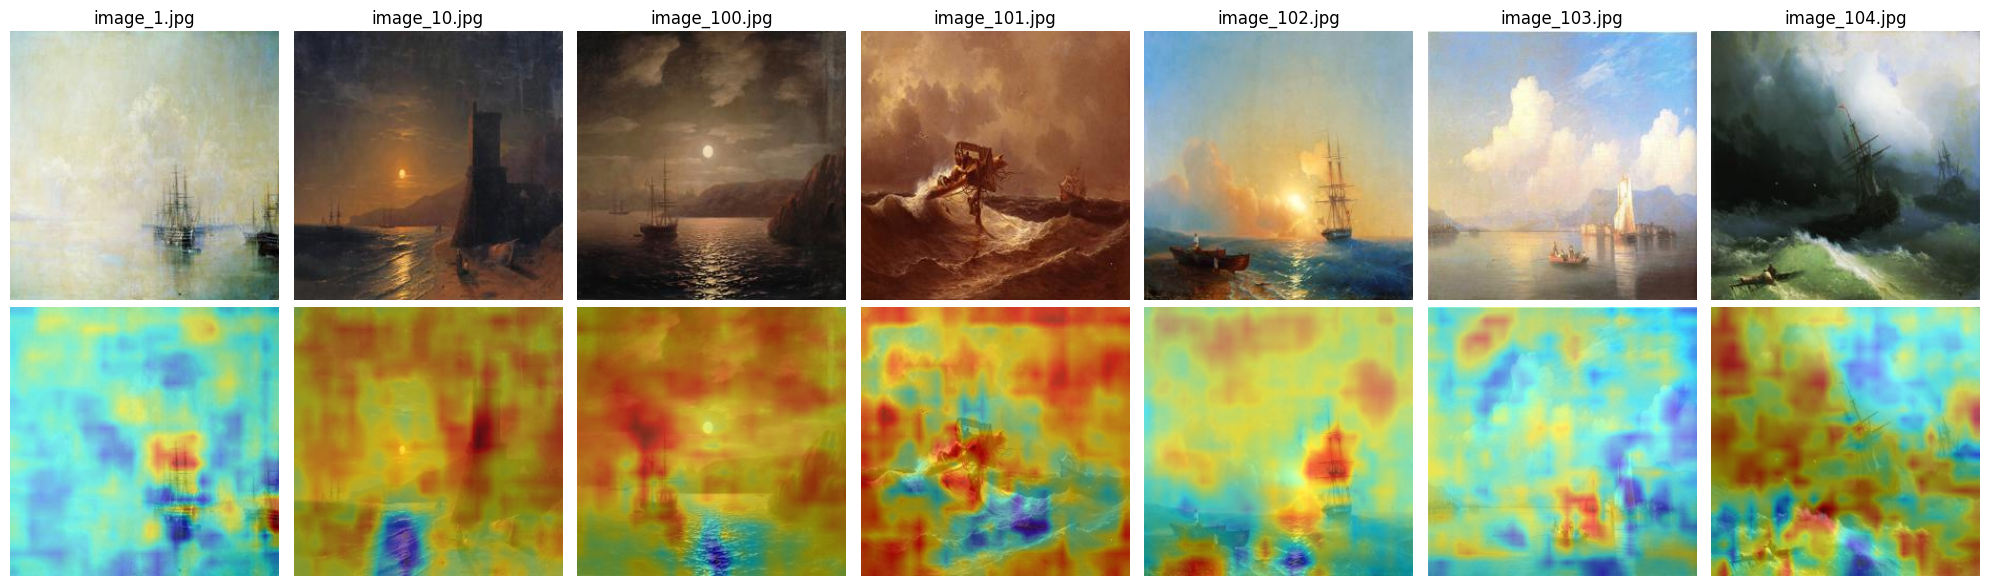

In [ ]:
image_paths = sorted(os.listdir("./data/aivazovsky"))[1:8]
images = [get_tensor_image(Image.open("./data/aivazovsky/" + i).convert("RGB")) for i in image_paths]

heatmaps = [score_cam(a_disc_resnet, target_layer, i) for i in images]
images_np = [tensor_to_numpy_image(img) for img in images]

show_originals_and_heatmaps(images_np, heatmaps, titles=image_paths)

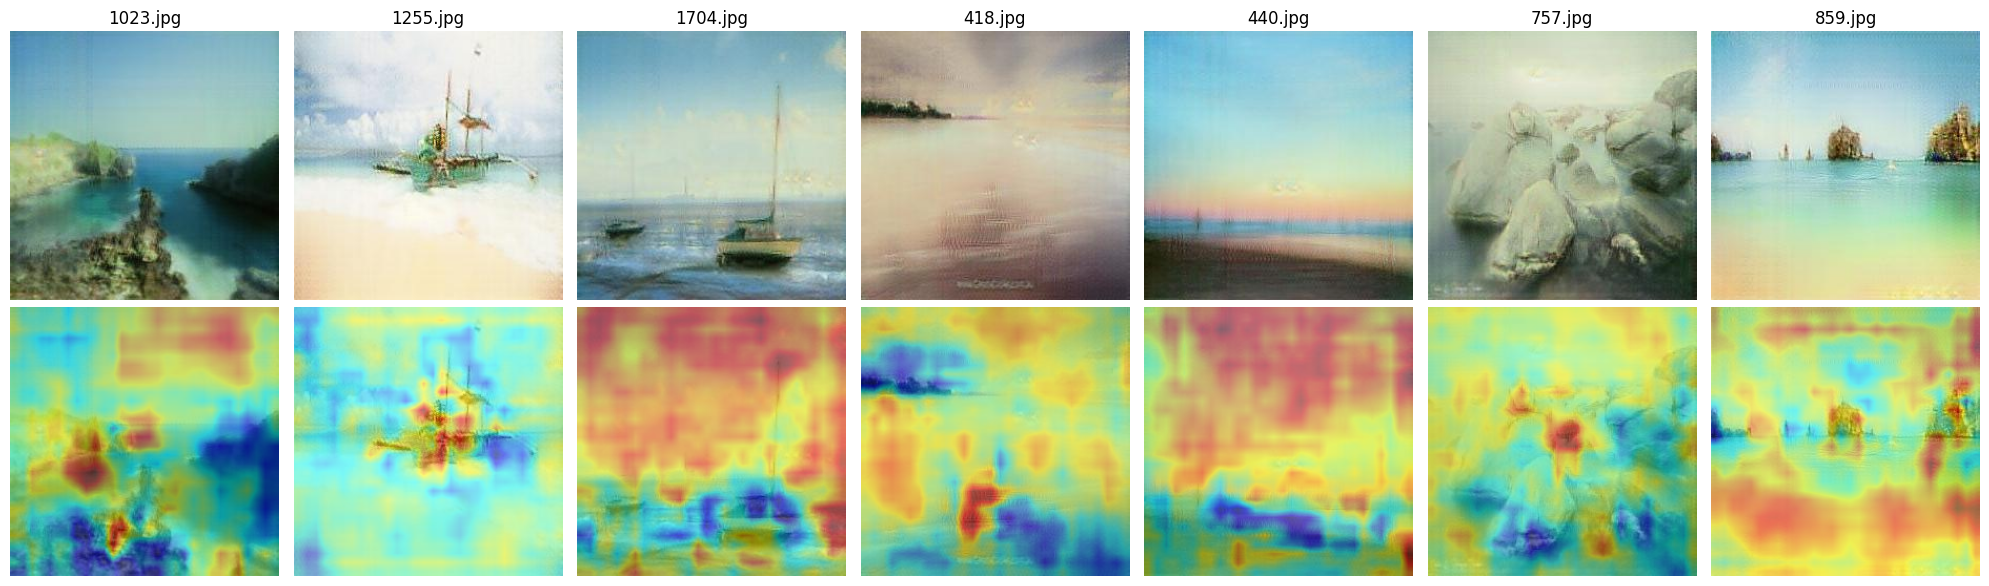

In [12]:
image_paths = sorted(os.listdir("./xai/results/aivazovsky_resnet_sea"))[:7]
images = [get_tensor_image(Image.open("./xai/results/aivazovsky_resnet_sea/" + i).convert("RGB")) for i in image_paths]

heatmaps = [score_cam(a_disc_resnet, target_layer, i) for i in images]

images_np = [tensor_to_numpy_image(img) for img in images]
show_originals_and_heatmaps(images_np, heatmaps, titles=image_paths)